# Roaming around hyperbolic space

The group of direct isometries of hyperbolic space is __PSL(2)__. Since this group is just SL(2) quotiented by $\pm I$

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

plt.style.use("dark_background")

## Adjoint action

The lie algebra $\mathfrak{sl}_2$ has dimension 3 and is the set of all traceless matrices.

The Killing form is a bilinear form on the Lie algebra.

In [2]:
def killing(X, Y):
    """ Killing form.
    
    Args:
        X (np.matrix): Lie algebra vector.
        Y (np.matrix): Lie algebra vector.
        
    Returns:
        Scalar.
    """
    return 4*np.trace(X*Y)

def rot_2D(alpha):
    """ Creates a 2D rotation matrix.
    
    Args:
        alpha (float): Angle in radians.
        
    Returns:
        np.matrix 2x2
    """
    c, s = np.cos(alpha), np.sin(alpha)
    return np.matrix([[c, -s], [s, c]])

P = np.matrix([[0, 1], [1, 0]])
Q = np.matrix([[1, 0], [0, -1]])
L = np.matrix([[0, -1], [1, 0]])
R_90 = rot_2D(np.pi/2)
R_45 = rot_2D(np.pi/4)
shear1 = np.matrix([[1, 1], [0, 1]])
h_acc = np.matrix([[2, 0], [0, 1/2]])

### Structure coefficient of $\mathfrak{sl}_2$
[P, Q] = 2L

[L, P] = -2Q

[L, Q] = 2P

### Manual computation of a killing form value

$k(L, L) = \mathrm{tr}(ad_L\circ ad_L)$

$$
ad_L \circ ad_L (L) = [L, [L, L]] = 0 \\
ad_L \circ ad_L (P) = [L, [L, P]] = [L, -2Q] = -4P \\
ad_L \circ ad_L (Q) = [L, [L, Q]] = [L, 2P] = -4Q
$$

Finally, $k(L, L) = -8$

In [11]:
B = np.identity(3)
for i, Mi in enumerate([P, Q, L]):
    for j, Mj in enumerate([P, Q, L]):
        B[i, j] = killing(Mi, Mj)
print("Matrix of Killing form in (P, Q, L) basis:\r\n", B)

Matrix of Killing form in (P, Q, L) basis:
 [[ 8.  0.  0.]
 [ 0.  8.  0.]
 [ 0.  0. -8.]]


Now we want to express the adjoint action in this basis.

For a matrix $g = \begin{pmatrix} a & b \\ c & d \end{pmatrix} \in SL(2)$, we can compute the action on the Lie algebra.

For $X \in \mathfrak{sl_2}$, the action is given by $\mathrm{Ad}(g)(X) = gXg^{-1}$ where $\mathrm{Ad}: \mathrm{SL}_2 \rightarrow \mathrm{GL}(\mathfrak{sl}_2)$

Here is the matrix of this action in the (P, Q, L) basis:

$$\begin{pmatrix} 
{a^2 - b^2 - c^2 + d^2 \over 2} & cd - ab & {-a^2 -b^2 + c^2 + d^2 \over 2} \\
bd - ac                         & ad + bc & ac + bd \\
{-a^2 + b^2 -c^2 + d^2 \over 2} & ab + cd & {a^2 + b^2 + c^2 + d^2 \over 2}
\end{pmatrix}$$

We have $d\mathrm{Ad}_I: \mathfrak{sl}_2 \rightarrow \mathfrak{gl}(\mathfrak{sl}_2)$
it is given by: $d\mathrm{Ad}_I(X)(Y) = [X, Y]$.

Computing the derivative is useful for:

- $dAd_I(X)(p)$ gives us the tangent at p
- Solving for p in $dAd_I(L)(p) = 0$ gives us the center of the rotation given by L (assuming L is a rotation).

We can also compute the derivative in coordinates:

${\delta\mathrm{Ad} \over \delta a} = \begin{pmatrix} 
a & -b & -a \\
- c & d & c \\
-a & b & a
\end{pmatrix} \implies {\delta\mathrm{Ad} \over \delta a}(I) = \begin{pmatrix} 
1 & 0 & -1 \\
0 & 1 & 0 \\
-1 & 0 & 1
\end{pmatrix}$

${\delta\mathrm{Ad} \over \delta b} = \begin{pmatrix} 
- b& -a & -b \\
d & c & d \\
b & a & b
\end{pmatrix} \implies {\delta\mathrm{Ad} \over \delta b}(I) = \begin{pmatrix} 
0 & -1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0
\end{pmatrix}$

${\delta\mathrm{Ad} \over \delta c} = \begin{pmatrix} 
- c & d & c \\
- a & b & a \\
-c & d & c
\end{pmatrix} \implies {\delta\mathrm{Ad} \over \delta c}(I) = \begin{pmatrix} 
0 & 1 & 0 \\
-1 & 0 & 1 \\
0 & 1 & 0
\end{pmatrix}
$

${\delta\mathrm{Ad} \over \delta d} = \begin{pmatrix} 
d & c & d \\
b & a & b \\
d & c & d
\end{pmatrix}
\implies {\delta\mathrm{Ad} \over \delta d}(I) = \begin{pmatrix} 
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 1
\end{pmatrix}$

$d\mathrm{Ad}_I(P) = \begin{pmatrix} 
0 & -1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0
\end{pmatrix} + \begin{pmatrix} 
0 & 1 & 0 \\
-1 & 0 & 1 \\
0 & 1 & 0
\end{pmatrix} = \begin{pmatrix} 
0 & 0 & 0 \\
0 & 0 & 2 \\
0 & 2 & 0
\end{pmatrix}$

$d\mathrm{Ad}_I(Q) = \begin{pmatrix} 
1 & 0 & -1 \\
0 & 1 & 0 \\
-1 & 0 & 1
\end{pmatrix} - \begin{pmatrix} 
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 1
\end{pmatrix} = 
\begin{pmatrix} 
0 & 0 & -2 \\
0 & 0 & 0 \\
-2 & 0 & 0
\end{pmatrix}$

$d\mathrm{Ad}_I(L) = - \begin{pmatrix} 
0 & -1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0
\end{pmatrix} + 
\begin{pmatrix} 
0 & 1 & 0 \\
-1 & 0 & 1 \\
0 & 1 & 0
\end{pmatrix} = 
\begin{pmatrix} 
0 & 2 & 0 \\
-2 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix}
$

Finally for a matrix $\begin{pmatrix} a & b \\ c & -a \end{pmatrix} \in \mathfrak{sl}_2$

We have:

$$
dAd_I \left ( \begin{pmatrix} a & b \\ c & -a \end{pmatrix} \right ) = 
\begin{pmatrix} 0 & c-b & -2a \\ b-c & 0 & b+c \\ -2a & b+c & 0 \end{pmatrix} $$

In [26]:
def d3_rep(g):
    """ A three dimensional representation of SL(2).
    
    Args:
        g (np.matrix): Element of SL(2).
        
    Returns:
        3x3 matrix.
    """
    a, b, c, d = g[0,0], g[0, 1], g[1, 0], g[1, 1]
    return np.matrix([
        [(a**2-b**2-c**2+d**2)/2, c*d-a*b, (-a**2-b**2+c**2+d**2)/2],
        [b*d-a*c, a*d+b*c, a*c+b*d],
        [(-a**2+b**2-c**2+d**2)/2, a*b+c*d, (a**2+b**2+c**2+d**2)/2]
    ])

In [5]:
# We do a bit of testing of this representation
np.testing.assert_allclose(
    d3_rep(np.identity(2)), 
    np.identity(3), 
    err_msg="The image of the identity of SL2 should be the identity of GL3")

np.testing.assert_allclose(
    d3_rep(R_45)*d3_rep(R_45),
    d3_rep(R_90),
    atol=1e-6,
    err_msg="Representation should respect the multiplication law")

np.testing.assert_allclose(
    d3_rep(R_45)*d3_rep(shear1),
    d3_rep(R_45*shear1),
    atol=1e-6,
    err_msg="Representation should respect the multiplication law")

np.testing.assert_allclose(
    d3_rep(h_acc)*d3_rep(shear1),
    d3_rep(h_acc*shear1),
    atol=1e-6,
    err_msg="Representation should respect the multiplication law")


## Hyperboloid model of hyperbolic space

The hyperbolic plane naturally embbeds into $\mathbb{R}^3$ as one sheet of a hyperboloid.

There is an action of SL(2) on this space which is given by a representation of SL(2) on $\mathbb{R}^3$ that preserves an indefinite bilinear form.

Here we check that the action preserves the bilinear form B.

In [6]:
np.testing.assert_allclose(
    d3_rep(shear1)*B*np.transpose(d3_rep(shear1)),
    B,
    err_msg="Representation should leave B invariant.")

np.testing.assert_allclose(
    d3_rep(R_45)*B*np.transpose(d3_rep(R_45)),
    B,
    err_msg="Representation should leave B invariant.")

np.testing.assert_allclose(
    d3_rep(h_acc)*B*np.transpose(d3_rep(h_acc)),
    B,
    err_msg="Representation should leave B invariant.")

In [23]:
def biliapp(bilinear, X, Y=None):
    """ Applies a bilinear map given by a matrix.
    
    Args:
        bilinear (np.matrix): Matrix that represents the bilinear app.
        X, Y (np.matrix): Column vectors. 
            If Y is None (default) we return the norm of X: B(X, X)
            
    Returns:
        Scalar
    """
    if not Y:
        Y = X
    return np.float(np.transpose(X)*bilinear*Y)

HH = 1/8*B

In [8]:
z_n1 = np.matrix([[0], [0], [-1]])
z_p1 = np.matrix([[0], [0], [1]])

print("Point\r\n", z_p1, "\r\nhas distance", biliapp(HH, z_p1))
print("Point\r\n", z_n1, "\r\nhas distance", biliapp(HH, z_n1))
print("Point\r\n", np.matrix([[1], [0], [0]]), "\r\nhas distance", biliapp(HH, np.matrix([[1], [0], [0]])))
print("Point\r\n", np.matrix([[-1], [0], [0]]), "\r\nhas distance", biliapp(HH, np.matrix([[-1], [0], [0]])))
print("Point\r\n", np.matrix([[0], [1], [0]]), "\r\nhas distance", biliapp(HH, np.matrix([[0], [1], [0]])))

Point
 [[0]
 [0]
 [1]] 
has distance -1.0
Point
 [[ 0]
 [ 0]
 [-1]] 
has distance -1.0
Point
 [[1]
 [0]
 [0]] 
has distance 1.0
Point
 [[-1]
 [ 0]
 [ 0]] 
has distance 1.0
Point
 [[0]
 [1]
 [0]] 
has distance 1.0


We can work on the hyperboloid sheet given by $p^THp = -1$, which is equivalent to: $x^2+y^2-z^2=-1$.

1.  We notice that this surface is symmetric by reflections on the x=0, y=0 and z=0 planes.

2.  We also notice that we have $0 \leq x^2+y^2 =z^2-1$ so $z^2 \geq 1$, so the surface is separated in two sheets with a forbidden band for $|z| \lt 1$.

3.  We also notice that this surface is invariant by rotations around the z axis.
    So we only need to understand the cut of the surface on the plane x = constant.

### Hyperboloid cuts

Cutting along the z axis. 

*   If z = 1, the we have x=y=0, and the cut is just a __point__.
*   If z > 1, then we have x^2+y^2=z^2-1 which is the equation for a __circle__ of center (0, 0, z) and radius $\sqrt{z^2-1}$

Cutting along the x axis.

We have $(y-z)(y+z)=-1-x^2$, which is the equation of a hyperbole with axes (1, -1) and (1, 1).

In particular, if x=0, we have $(y-z)(y+z)=-1$.

Writing $d = y-z$ and $a=y+z$, we have $ad=-1$, so $d={-1\over a}$
Finally we can recover the values of y and z, parametrized by $a \in \mathbb{R}^*$:

$$
y={a+d \over 2} \\
z={a-d \over 2} \\
d={-1 \over a}
$$

Which gives finally

$$
y={a^2 - 1\over 2a} \\
z={a^2 + 1\over 2a}
$$

In [21]:
import numpy as np
from matplotlib import pyplot as plt

plt.style.use("dark_background")
a = np.linspace(0.2,5)

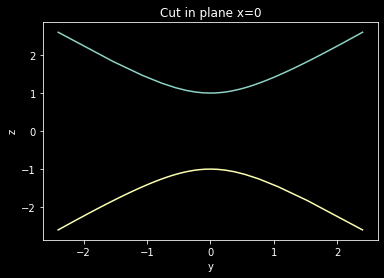

In [22]:
plt.plot((a**2-1)/ 2/a, (a**2+1)/2/a)
plt.plot(-(a**2-1)/ 2/a, -(a**2+1)/2/a)
plt.xlabel("y")
plt.ylabel("z")
plt.title("Cut in plane x=0")
None

In [9]:
d3_rep(R_45)*z_p1

matrix([[0.],
        [0.],
        [1.]])

Testing the action of the Lie algebra basis on (0, 0, 1).

We verify that L acts as a rotation around (0, 0, 1):
*   It leaves (0, 0, 1) fixed
*   It loops on itself (the subgroup $\{e^{tL}\}_{t\in \mathbb{R}}$ is a circle)

In [10]:
# verify the fixed point property
angle = np.random.uniform(low=0, high=np.pi*2, size=1)
angle = angle[0]
np.testing.assert_almost_equal(
    d3_rep(linalg.expm(L*angle))*z_p1,
    z_p1,
    err_msg="We expect L to act like a rotation around (0, 0, 1)")

# verify the looping property (rotation characterization)
np.testing.assert_almost_equal(
    d3_rep(linalg.expm(L*np.pi*2)),
    np.identity(3),
    err_msg="We expect 2piL to be back to the identity")

Given the action of L on Q and P, it looks like:

__Basis for (0,0,1)__: Q acts as $D_x$, P as $D_y$ and L as $D_\theta$

## A Cross product for hyperbolic geometry

$w \rightarrow \det(v_1, v_2, w)$ is a linear form.
So there exists a unique vector $v_1 \times v_2$ such that 
$$\det(v_1, v_2, w) = B(v_1 \times v_2, w)$$

In [6]:
def h_cross(u, v):
    """ Hyperbolic cross-product.
    
    Args:
        u (array-like): 3D vector.
        v (array-like): 3D vector.
    Returns:
        3D vector u x v such that det(u, v, w) = H(u x v, w) forall w.
    """
    u1, u2, u3 = np.asarray(u).reshape(-1)
    v1, v2, v3 = np.asarray(v).reshape(-1)
    return np.matrix([u2*v3 - u3*v2, -u1*v3+u3*v1, -u1*v2 + u2*v1])

In [12]:
e1 = np.matrix([1, 0, 0])
e2 = np.matrix([0, 1, 0])
e3 = h_cross(e1, e2)
1/8*e3*B*np.transpose(e3)

matrix([[-1.]])

In [21]:
e1 = np.matrix([1.5, -2, 3])
e2 = np.matrix([1, 1, -1])
e1_X_e2 = h_cross(e1, e2)
w = np.matrix([-1, 1, 3]) # a test vector

print("Det(e1, e2, w) =", np.linalg.det(np.stack([e1, e2, w])))
print("H(e1 X e2, w) =", 1/8*e1_X_e2*B*np.transpose(w))
# 1/8*e3*B*np.transpose(e3)

# np.stack([e1, e2])

Det(e1, e2, w) = 15.999999999999991
H(e1 X e2, w) = [[16.]]


In [22]:
e1_X_e2

matrix([[-1. ,  4.5, -3.5]])

A matrix M respects the bilinear form B, if and only if:
$$M^TBM = B$$

## Metric on the hyperbolic plane

Let's check the image of the parabolic subgroup:

$$
\mathrm{Ad}\left(\exp\begin{pmatrix}
0 & t \\
0 & 0
\end{pmatrix}\right)
= \mathrm{Ad}\begin{pmatrix}
1 & t \\
0 & 1
\end{pmatrix}
= \begin{pmatrix} 
{2 - t^2 \over 2} & -t & {-t^2 \over 2} \\
t               & 1 & t \\
{t^2 \over 2} & t  & {2 + t^2 \over 2}
\end{pmatrix}$$

Image of the Lorentzian boost group:

$$
\mathrm{Ad}\left(\exp\begin{pmatrix}
\lambda & 0 \\
0 & -\lambda
\end{pmatrix}\right)
=
\mathrm{Ad}\begin{pmatrix}
e^\lambda & 0 \\
0 & e^{-\lambda}
\end{pmatrix} =\begin{pmatrix} 
\cosh2\lambda  & 0 & -\sinh2\lambda \\
0                         & 1  & 0 \\
-\sinh2\lambda & 0  & \cosh2\lambda
\end{pmatrix}$$

Image of the rotation subgroup:

$$
\mathrm{Ad}\left(\exp\begin{pmatrix}
0 & -\theta \\
\theta & 0
\end{pmatrix}\right)
=
\mathrm{Ad}\begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix} =
\begin{pmatrix} 
\cos2\theta  & \sin2\theta & 0 \\
-\sin2\theta & \cos2\theta & 0 \\
0            & 0           & 1
\end{pmatrix}$$


Image of another Lorentzian boost subgroup:

$$
\mathrm{Ad}\left(\exp\begin{pmatrix}
0 & \alpha\\
\alpha & 0
\end{pmatrix}\right)
= \mathrm{Ad}\left(\begin{pmatrix}
\cosh\alpha & \sinh\alpha\\
\sinh\alpha & \cosh\alpha
\end{pmatrix}
\right)
= \begin{pmatrix} 
1 & 0 & 0 \\
0 & \cosh2\alpha & \sinh2\alpha \\
0 & \sinh2\alpha & \cosh2\alpha
\end{pmatrix}
$$


Let's start from the point (0, 0, 1) of norm -1. (1, 0, 0) is tangent to the hyberboloid at this point.
Because the action restricted to SO(2) has spin 2, a rotation of pi/2 is given by $\phi(R_{\pi \over 4})$, which maps (1, 0, 0) to (0, -1, 0).
So now we know that (1, 0, 0) and (0, -1, 0) form a local orthogonal basis for the tangent space at (0,0,1).